# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#  Preliminary Look and Data Cleansing

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

## General Information & Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Convert Data Types

In [9]:
df = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].convert_dtypes()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   Int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


In [11]:
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   string 
 1   gender            7032 non-null   string 
 2   SeniorCitizen     7032 non-null   Int64  
 3   Partner           7032 non-null   string 
 4   Dependents        7032 non-null   string 
 5   tenure            7032 non-null   Int64  
 6   PhoneService      7032 non-null   string 
 7   MultipleLines     7032 non-null   string 
 8   InternetService   7032 non-null   string 
 9   OnlineSecurity    7032 non-null   string 
 10  OnlineBackup      7032 non-null   string 
 11  DeviceProtection  7032 non-null   string 
 12  TechSupport       7032 non-null   string 
 13  StreamingTV       7032 non-null   string 
 14  StreamingMovies   7032 non-null   string 
 15  Contract          7032 non-null   string 
 16  PaperlessBilling  7032 non-null   string 


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Duplicated data check

In [15]:
df.duplicated().sum()

0

**Observations:**
1. There are no duplicate and missing value here

# Data understanding

## Statistical summary

In [16]:
categoricals = ['customerID', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

numericals = ['SeniorCitizen', 'tenure','MonthlyCharges', 'TotalCharges'] 

In [17]:
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Observation**:
* Overall, the minimum and maximum values make sense for each column, SeniorCitizen is weird because it contain boolean value between yes or no (1 = yes, 0 = no)
* `Churn` column is also boolean value too, but it will be shown as a hue later 
*  50% (Median) << Mean in`tenure`, `TotalCharges`, indicating positive skew 
*  50% (Median) >> Mean in `MonthlyCharges`, indicating negative skew. But later, it shown us that it is a bimodal distribution

In [18]:
df[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


**Observations:**
* The categorical variable majority just only have 2 or 3 unique value

In [19]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0280-XJGEX    1
7795-CFOCW    1
9237-HQITU    1
9305-CDSKC    1
             ..
4801-JZAZL    1
8361-LTMKD    1
1122-JWTJW    1
4807-IZYOZ    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: Int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: Int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: Int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: Int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: Int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: Int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: Int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

**Observation**:
* Overall, the majority of the variable contain "Yes", "No', and "No services used". So the surveyor of the data has mapped their survey in this way to see what important major factor that make people churn from the services. From this data, we must analyze the data first, then, if needed, we create a model of the data
* It shown us that there are so many factor that makes people churn from our company, not only by a simple problem that can be solved by a single snap of a finger
* The amount of female ~ male, majority use phoneservice, ~50% of the users has partner, 80% of the people uses phoneservice, etc.

# Univariate Analysis

## Boxplot to detect outliers

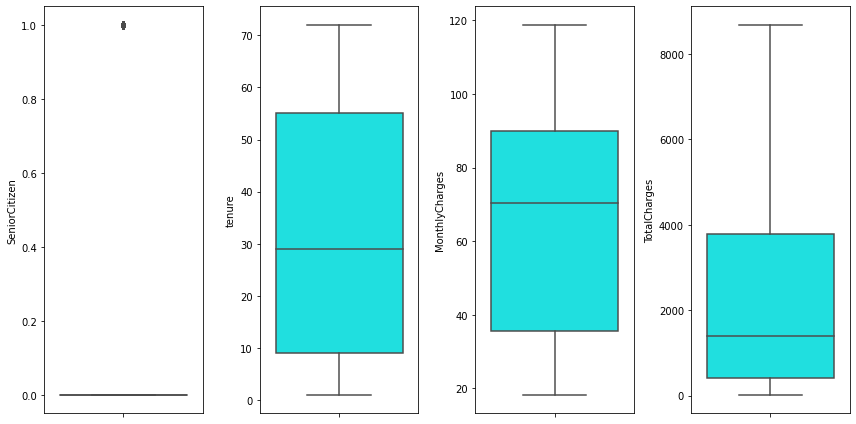

In [20]:
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

**Observation**:
* These variable has no outlier, except SeniorCitizen because it contain only boolean value 0-1
* `TotalCharges` column has overall positive skew distribution because the value of the curve concentrated more to the bottom


In [21]:
outlier = df['SeniorCitizen'].max()

df[df['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.5,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.5,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.4,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.0,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


**Observation**:
1. There are so many outlier because it was the boolean value
2. There is no outlier from other variables, we can see from the previous figure

## KDE plot for knowing the distribution form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

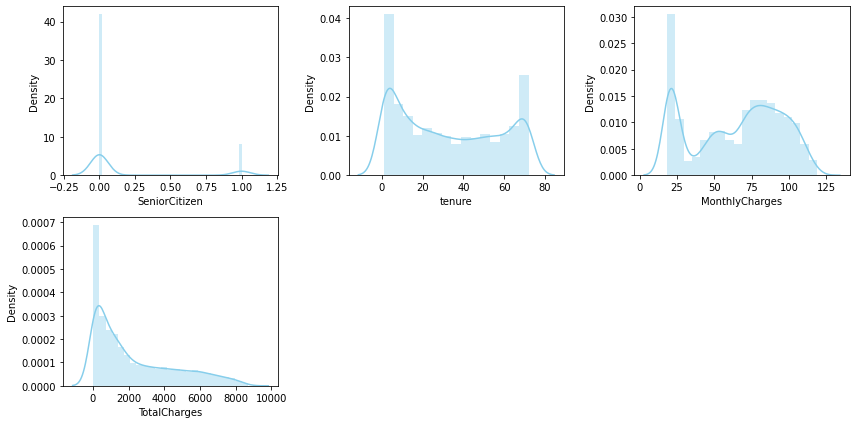

In [22]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

**Observation**:
1. Junior Citizen (when the `SeniorCitizen` = 0) population is about 5x times larger than the Senior Citizen
2. `TotalCharges` is absolutely positive skew distribution data
3. `Tenure` is also positive skew overall, but we can see it has risen value at the end of the curve
4. `MonthlyCharges` is a bimodal distribution curve
5. There are no normal distribution curve here

# Bivariate Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   string 
 1   gender            7032 non-null   string 
 2   SeniorCitizen     7032 non-null   Int64  
 3   Partner           7032 non-null   string 
 4   Dependents        7032 non-null   string 
 5   tenure            7032 non-null   Int64  
 6   PhoneService      7032 non-null   string 
 7   MultipleLines     7032 non-null   string 
 8   InternetService   7032 non-null   string 
 9   OnlineSecurity    7032 non-null   string 
 10  OnlineBackup      7032 non-null   string 
 11  DeviceProtection  7032 non-null   string 
 12  TechSupport       7032 non-null   string 
 13  StreamingTV       7032 non-null   string 
 14  StreamingMovies   7032 non-null   string 
 15  Contract          7032 non-null   string 
 16  PaperlessBilling  7032 non-null   string 


### Change the Target Value with 0, 1

In [24]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [25]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.60,1


#### I have experienced some trouble before and I must to start run from beginning. So I decided to copy my dataframe in terms if I need backup

In [26]:
df1 = df.copy
df2 = df.copy
df3 = df.copy
df4 = df.copy
df5 = df.copy

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   string 
 1   gender            7032 non-null   string 
 2   SeniorCitizen     7032 non-null   Int64  
 3   Partner           7032 non-null   string 
 4   Dependents        7032 non-null   string 
 5   tenure            7032 non-null   Int64  
 6   PhoneService      7032 non-null   string 
 7   MultipleLines     7032 non-null   string 
 8   InternetService   7032 non-null   string 
 9   OnlineSecurity    7032 non-null   string 
 10  OnlineBackup      7032 non-null   string 
 11  DeviceProtection  7032 non-null   string 
 12  TechSupport       7032 non-null   string 
 13  StreamingTV       7032 non-null   string 
 14  StreamingMovies   7032 non-null   string 
 15  Contract          7032 non-null   string 
 16  PaperlessBilling  7032 non-null   string 


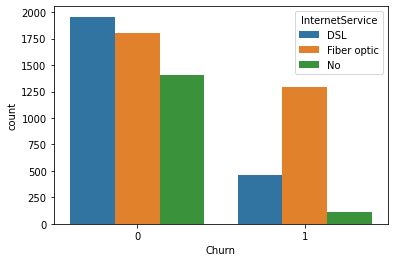

In [28]:
sns.countplot(data=df,x='Churn',hue='InternetService')

**Observation**:
1. `Churn` = 1 means people stop doing business, and otherwise
2. FiberOptic has only little significant impact on churn (if we just see this two variable only). Many people still stop doing business
3. DSL and no InternetService has a bigger impact to the people behavior to stop doing business
4. There are many other variables left, we can't say FiberOptic is bad. We must check all of the factors first, see which one of the most impactful factor, and then interpret all of the data at a helicopter view

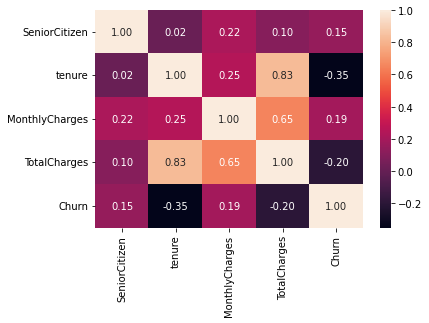

In [29]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

**Observation**:
1. `tenure` and `TotalCharges' are highly correlated each other
2. We must choose one from these two variables because they are redundant

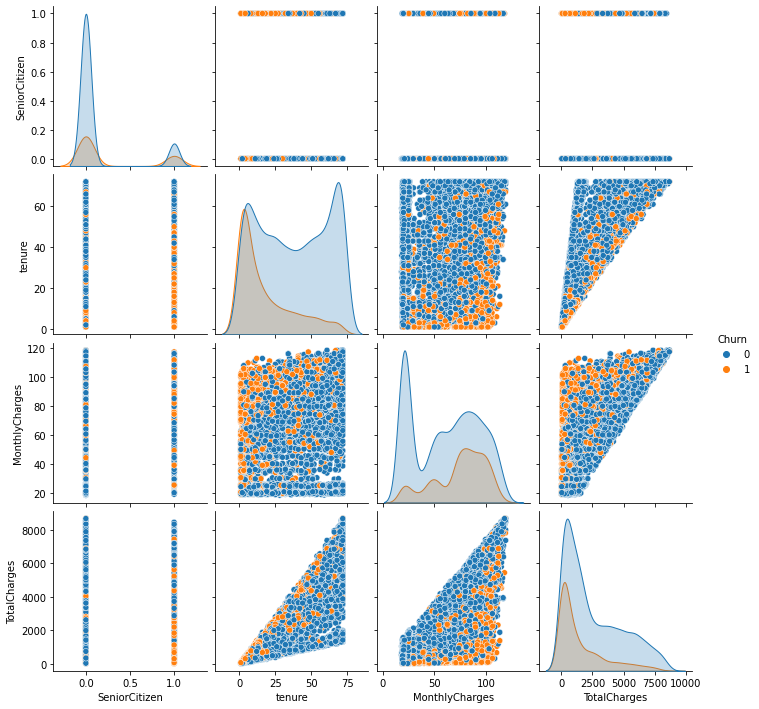

In [30]:
sns.pairplot(df, hue='Churn')

**Observation**:
1. We can see that the longer `tenure` here increase the possibility of the people NOT to churn
2. At any rate of `MonthlyCharges` & `TotalCharges`, majority of people are still not churned

Later I will use simple symbol after this to make it compact
3. Majority people that churn are `SeniorCitizen` that has << tenure, >> MonthlyCharges, << TotalCharges
4. << tenure, >> MonthlyCharges = More churn
5. No significant correlation between tenure and TotalCharges
6. << TotalCharges, >> MonthlyCharges = More Churn

## EDA Questions
1. How much male and female from Senior or Junior Citizen pays the monthly charges and the churn rate?
2. Payment method vs Churn Rate?

In [31]:
pays= (df.groupby(['gender','SeniorCitizen']).agg(Monthly_Charges=('MonthlyCharges','mean'),ChurnTotal=('Churn','sum')).reset_index().sort_values('gender',ascending=True).head(4))
pays

,gender,SeniorCitizen,Monthly_Charges,ChurnTotal
0,Female,0,62.119811,699
1,Female,1,81.109771,240
2,Male,0,61.656101,694
3,Male,1,78.544425,236


In [32]:
# (pays/ pays.ChurnTotal.sum() * 100).astype(str) + '%'

In [33]:
pays1 = df.groupby(['gender','SeniorCitizen']).size()
pays1

gender  SeniorCitizen
Female  0                2915
        1                 568
Male    0                2975
        1                 574
dtype: int64

In [34]:
Churn_Rate = {'ChurnRate': [pays['ChurnTotal'][0]/pays1[0], pays['ChurnTotal'][1]/pays1[1], pays['ChurnTotal'][2]/pays1[2], pays['ChurnTotal'][3]/pays1[3]]}

In [35]:
Churn_Rate

{'ChurnRate': [0.2397941680960549,
  0.4225352112676056,
  0.23327731092436974,
  0.41114982578397213]}

**Observation**:
1. Overall, ChurnRate is higher on the SeniorCitizen population
2. SeniorCitizen mostly pay higher than the Junior Citizen
3. Gender has no significant impact on the Churn Rate


# No 2

In [36]:
payment_method = (df.groupby(['gender','SeniorCitizen','PaymentMethod']).agg(paymentcount=('PaymentMethod','count'),ChurnTotal=('Churn','sum')).reset_index().sort_values('gender',ascending=True).head(10))

In [37]:
payment_method

,gender,SeniorCitizen,PaymentMethod,paymentcount,ChurnTotal
0,Female,0,Bank transfer (automatic),675,110
1,Female,0,Credit card (automatic),641,96
2,Female,0,Electronic check,874,364
3,Female,0,Mailed check,725,129
4,Female,1,Bank transfer (automatic),112,26
5,Female,1,Credit card (automatic),110,35
6,Female,1,Electronic check,296,158
7,Female,1,Mailed check,50,21
8,Male,0,Bank transfer (automatic),634,95
9,Male,0,Credit card (automatic),659,74


In [40]:
Churn_Rate2 = payment_method['ChurnTotal']/payment_method['paymentcount']
Churn_Rate2

0    0.162963
1    0.149766
2    0.416476
3    0.177931
4    0.232143
5    0.318182
6    0.533784
7    0.420000
8    0.149842
9    0.112291
dtype: float64

**Observation**:
1. Overall, Female has more Payment Method than Male
2. Index = 2, 6, and 7 has high churn rate. It shows us Female with Electronic check & Mailed check susceptible to churn 